### K디지털선도기업 교육
#### Python 데이터분석	입문

- 강사: 전대일, 천재교육 AI센터 데이터분석기획팀장(www.daeilchun.com)
<p>

- 일정: 2022.12.9 ~ 12.15(5일x8시간, 40시간)
<p>

- 교육내용(수정됨)
    - Day1: 파이썬 기초 복습, 프로젝트 소개
    - Day2: 파이썬 정규식(Regex) 연습, 프로젝트 진행(수능 영어 지문 샘플 분석)
    - -->Day3: 파이썬 PostgreSQL 클라이언트, 프로젝트 진행(수능 영어 raw data DB 입력)
    - Day4: NLTK, Standford Core NLP 설치, 프로젝트 진행(수능 영어 데이터 정제)
    - Day5: 프로젝트 진행 및 발표
<p>

- 프로젝트: 최근 3년간 수학능력평가 영어 시험에서 등장한 모든 문장을 수집하여 연도별 통계 분석을 수행하라. 
    - 기초: 연도별 영문장의 길이 분포, 연도별 고유 단어수, 연도별 최다 빈출어 분포 및 Top 20, 연도별 워드클라우드
    - 난이도: ‘To 부정사’가 포함된 문장을 찾아 전체 수능 영어문장 대비 빈도를 구하라(단, ‘To 부정사’가 포함된 문장을 정확하게 식별하기 어려울 수 있음)

#### 1. Python DB 연결
- Why
    - 실무에서는 파일보다 DB 연결작업이 많을 것임
    - 데이터 수집 및 분석 중간 결과 등을 파일로 관리하기 보다 DB에 관리

<p>

- How 
    - DB별로 Python client 라이브러리 등이 다양하게 존재
    - sybase/sap ... 조금 어려움
    - 유저 계정, 접근 권한 등의 설정에 손이 많이감(DBA에게 공손히 부탁~)
<p>

- 오늘의 practice
    - PostgreSQL python client 2종 이상 테스트
    - 테스트를 위한 테이블 설계/생성 필요
    - root(superuser, postgres) 계정으로 진행(추후 계정 생성 후 진행 권장)
    - 프로젝트에 사용할 수능 영어 문장(정제전이라도 일단 데이터를) DB에 저장

In [ ]:
# DBeaver 를 사용하여 테스트를 위한 DB, 테이블 등을 하나 생성한다.
# DBeaver 를 사용하여 수능 영어문장 입력을 위한 테이블을 하나 생성한다.

In [1]:
## PostgreSQL python client 1 설치 및 테스트
# psycopg2 
# https://pypi.org/project/psycopg2/

!pip install psycopg2

     ---------------------------------------- 1.2/1.2 MB 10.7 MB/s eta 0:00:00


In [31]:
## 파이썬 클라이언트를 활용해서 dvdrental DB 내에 actor 복제 테이블을 만들어 보자

# 1. Python에서 신규 테이블을 생성하자: 테이블명 'actor_replicate'
# 1.1. actor와 동일한 스키마로 설계

# 2. Python에서 원본 actor 테이블의 레코드를 모두 내려받아서 dataframe에 보관.
# 3. dataframe의 값을 actor_replicate 테이블로 insert 진행한다.
# 4. 원본 actor와 replicate 테이블의 값이 동일한지 비교한다.


# 2번 task(데이터다운로드)부터 진행

import psycopg2
import pandas as pd

connection = psycopg2.connect(host="localhost", dbname="dvdrental", user="postgres", password="qwe123!@#", port=5432)

cur = connection.cursor()

cur.execute('SELECT * FROM actor')

rows = cur.fetchall() # list형으로 fetch. 단, 접속 라이브러리마다 데이터형이 다를 수 있음.

actor_table = pd.DataFrame(rows)
actor_table.columns=['actor_id','first_name','last_name', 'last_update']
actor_table.head()

# cur.close()
# connection.close()

,actor_id,first_name,last_name,last_update
0,1,Penelope,Guiness,2013-05-26 14:47:57.620
1,2,Nick,Wahlberg,2013-05-26 14:47:57.620
2,3,Ed,Chase,2013-05-26 14:47:57.620
3,4,Jennifer,Davis,2013-05-26 14:47:57.620
4,5,Johnny,Lollobrigida,2013-05-26 14:47:57.620


In [33]:
# 1. Python에서 신규 테이블을 생성하자: 테이블명 'actor_replicate'

sql_string = "CREATE TABLE IF NOT EXISTS actor_replicate (actor_id integer, first_name VARCHAR(25), last_name VARCHAR(25), last_update VARCHAR(30))"

cur.execute(sql_string)

cur.execute("commit")



In [35]:
# 3. dataframe의 값을 actor_replicate 테이블로 insert 진행한다.
# 아까 내려받은 dataframe에 for/while를 이용하여 각 row 를 새로 생성한 테이블에 인서트

# 인서트 하나만 테스트 해보자!
sql_string = "INSERT INTO actor_replicate (actor_id, first_name, last_name, last_update) VALUES (500, 'Danaka', '김경욱', '2035-12-31 14:47:57.620')"

cur.execute(sql_string)

cur.execute("commit")


In [36]:

# 하나 인서트되었는지 select로 테스트해보자
cur.execute("select * from actor_replicate")
rows = cur.fetchall()
rows


[(500, 'Danaka', '김경욱', '2035-12-31 14:47:57.620')]

In [ ]:
# 이제 반복문으로 200개 레코드를 인서트해보자

for i in range(len(actor_table)): #복제할 테이블 길이만큼만 반복
#for i in range(5): #5개만 테스트해볼 때

    # df 각 row에서 value 추출 및 변수에 할당
    actor_id = actor_table['actor_id'][i]
    first_name = actor_table['first_name'][i]
    last_name = actor_table['last_name'][i]
    last_update = actor_table['last_update'][i]

    sql_string = "INSERT INTO actor_replicate (actor_id, first_name, last_name, last_update) VALUES ({}, '{}', '{}', '{}')".format(actor_id, first_name, last_name, last_update) # 코드 완성 해보세요~

    # print(sql_string) # sql 구문이 잘 생성되는지 몇개만 확인하고 싶을 때

    cur.execute(sql_string)

cur.execute("commit")

# 인서트가 잘 되었는지 테스트: DBeaver에서 확인하거나 아래와 같이 확인
# cur.execute("select * from actor_replicate limit 10")
# rows = cur.fetchall()
# rows

In [44]:
connection.close()

In [43]:
# PostgreSQL python client 2 설치 및 테스트
# pyodbc 로 위의과정 반복! (복제테이블명을 actor_replicate2 로 진행)

!pip install pyodbc


In [51]:
# pyodbc 드라이버 종류 확인: PostgreSQL 드라이버가 없으면 해당 ODBC 드라이버를 검색해서 찾아서 설치한다.
import pyodbc

pyodbc.drivers()

['SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'ODBC Driver 18 for SQL Server',
 'PostgreSQL ANSI(x64)',
 'PostgreSQL Unicode(x64)',
 'PostgreSQL ANSI',
 'PostgreSQL Unicode']

In [62]:
# 접속테스트

import pyodbc

conn_str = (
    "DRIVER={PostgreSQL Unicode};"
    "DATABASE=dvdrental;"
    "UID=postgres;"
    "PWD=qwe123!@#;"
    "SERVER=localhost;"
    "PORT=5432;"
    )

conn = pyodbc.connect(conn_str)


In [64]:
# Actor 테이블 받아오기

cur = conn.cursor()

cur.execute('SELECT * FROM actor')

rows = cur.fetchall() # list형으로 fetch. 단, 접속 라이브러리마다 데이터형이 다를 수 있음.


# pyodbc가 list of tuple이 아닌 rows 로 전달하여, 단일 컬럼으로 출력됨

actor_table = pd.DataFrame(rows)
actor_table.head()

,0
0,"[1, Penelope, Guiness, 2013-05-26 14:47:57.620..."
1,"[2, Nick, Wahlberg, 2013-05-26 14:47:57.620000]"
2,"[3, Ed, Chase, 2013-05-26 14:47:57.620000]"
3,"[4, Jennifer, Davis, 2013-05-26 14:47:57.620000]"
4,"[5, Johnny, Lollobrigida, 2013-05-26 14:47:57...."


In [65]:
# pyodbc fetch 값을 tuple로 형을 변환해서 df 를 만든다.

actor_table = pd.DataFrame([tuple(t) for t in rows])
actor_table.columns=['actor_id','first_name','last_name', 'last_update']
actor_table.head()


,actor_id,first_name,last_name,last_update
0,1,Penelope,Guiness,2013-05-26 14:47:57.620
1,2,Nick,Wahlberg,2013-05-26 14:47:57.620
2,3,Ed,Chase,2013-05-26 14:47:57.620
3,4,Jennifer,Davis,2013-05-26 14:47:57.620
4,5,Johnny,Lollobrigida,2013-05-26 14:47:57.620


In [66]:
# 테이블 생성 actor_replicate2
sql_string = "CREATE TABLE IF NOT EXISTS actor_replicate2 (actor_id integer, first_name VARCHAR(25), last_name VARCHAR(25), last_update VARCHAR(30))"

cur.execute(sql_string)

cur.execute("commit")

In [68]:
for i in range(len(actor_table)): #복제할 테이블 길이만큼만 반복
#for i in range(5): #5개만 테스트해볼 때

    # df 각 row에서 value 추출 및 변수에 할당
    actor_id = actor_table['actor_id'][i]
    first_name = actor_table['first_name'][i]
    last_name = actor_table['last_name'][i]
    last_update = actor_table['last_update'][i]

    sql_string = "INSERT INTO actor_replicate2 (actor_id, first_name, last_name, last_update) VALUES ({}, '{}', '{}', '{}')".format(actor_id, first_name, last_name, last_update) # 코드 완성 해보세요~

    # print(sql_string) # sql 구문이 잘 생성되는지 몇개만 확인하고 싶을 때

    cur.execute(sql_string)

cur.execute("commit")

#### 2. 프로젝트 진행
- 지난 3년 수능영어 PDF 파일 다운로드
- PDF 파싱 라이브러리 테스트
- 수능 PDF 파일 1개 로딩 및 테스트
- -->문장 입력용 테이블 설계
- -->영어 문장 입력 테스트

##### 2.1 PDF 파일 다운로드
- 한국교육과정평가원>자료마당>기출문제
- https://www.kice.re.kr/boardCnts/list.do?boardID=1500234&m=0403&s=suneung&searchStr=


##### 2.2 1차 수집 및 분석(어제 리뷰 및 이어서 진행)

In [ ]:
# java 설치
# Java 윈도우 환경변수 추가

In [72]:
# tika 는 java 8이 필요. 설치 확인 후 진행.
!pip install tika


In [1]:
# 각자 PDF에서 텍스트를 추출하는 라이브러리를 찾아본다.
# 관련 게시글을 검토해서 테스트를 희망하는 라이브러리를 사용해본다.

# PDF to Text
from tika import parser # pip install tika

raw = parser.from_file('수능영어_2022년.pdf')

2022-12-13 13:59:39,991 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [2]:
raw.keys()

dict_keys(['metadata', 'content', 'status'])

In [3]:
raw['content'][0:2000]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<BFB5BEEE5FC8A65F313130325F3232BDC33135BAD02E687770>\n\n\n1\n8\n\n  1번부터 17번까지는 듣고 답하는 문제입니다. 1번부터 \n\n15번까지는 한 번만 들려주고, 16번부터 17번까지는 두 번 \n\n들려 니다. 방송을 잘 듣고 답을 하시기 바랍니다.\n\n1. 다음을 듣고, 여자가 하는 말의 목 으로 가장 한 것을 \n\n고르시오.\n\n① 조련사 자격증 취득 방법을 설명하려고\n\n② 동물 병원 확장 이 을 공지하려고\n\n③ 새로 출시된 개 사료를 소개하려고\n\n④ 반려동물 입양 차를 안내하려고\n\n⑤ 개 훈련 센터를 홍보하려고\n\n2. 화를 듣고, 남자의 의견으로 가장 한 것을 고르시오.\n\n① 여행 에 합리 으로 산을 계획해야 한다.\n\n② 여행 가서 할 것을 무 많이 계획하면 안 된다.\n\n③ 인생에서 자신의 원칙을 고수하는 것이 요하다.\n\n④ 여행은 사고의 폭을 확장시켜 사람을 성장하게 한다.\n\n⑤ 보호자 없이 학생끼리 여행하는 것은 안 하지 않다.\n\n3. 화를 듣고, 두 사람의 계를 가장 잘 나타낸 것을 고르시오.\n\n① 라디오 쇼 진행자－ 제빵사 ② 리포터－ 과수원 주인\n\n③ 고주－ 요리사 ④ 방송 작가－ 경제학자\n\n⑤ 유통업자－ 농부\n\n4. 화를 듣고, 그림에서 화의 내용과 일치하지 않는 것을 고르시오.\n\n5. 화를 듣고, 남자가 할 일로 가장 한 것을 고르시오.\n\n① 리본 가져오기 ② 선 라스 주문하기\n\n③ 사진사 섭외하기 ④ 설문 조사 실시하기\n\n⑤ 졸업 연설문 작성하기\n\n6. 화를 듣고, 여자가 지불할 액을 고르시오. [3 ]\n\n① $36 ② $45 ③ $50 ④ $54 ⑤ $60\n\n7. 화를 듣고, 남자가 탁구 연습을 할 수 없는 이유를 고르시오.\n\n① 학교 도

In [4]:
# 영문, 숫자, 주요 문장부호(,.?!;'" - 수능문제를 1차 검토하면서 추가 보완)

import re

cleansed = re.sub('[^A-Za-z0-9,.?!;\'\"]+',' ', raw['content'])

cleansed[0:2000]

' BFB5BEEE5FC8A65F313130325F3232BDC33135BAD02E687770 1 8 1 17 . 1 15 , 16 17 . . 1. , . 2. , . . . . . . 3. , . 4. , . 5. , . 6. , . 3 36 45 50 54 60 7. , . 8. , Little Readers Class . 9. 2021 Family Science Festival , . 12 7 . 8 . . 11 . . 10. , . Study Rooms Room Capacity persons Available Times Price per hour Projector A 2 3 9 a.m. 11 a.m. 10 B 4 6 9 a.m. 11 a.m. 16 C 4 6 2 p.m. 4 p.m. 14 D 6 8 2 p.m. 4 p.m. 19 E 6 9 4 p.m. 6 p.m. 21 11. , . Just give me about ten minutes. It took an hour for us to get back home. I think you need to focus on your work. It was nice of you to invite my co workers. Call me when you finish sending the email. 12. , . Excellent. I like the camera you bought for me. Good. I ll stop by and get it on my way home. Never mind. I ll drop off the camera tomorrow. I see. Thanks for taking those pictures of me. No way. That s too expensive for the repair. 2022 1 3 . 2 2 8 13. , . 3 Man No worries. Stress is not always as bad as you think. Don t forget to bring a c

In [5]:
result = cleansed.split(".")
result[50:60]

['m',
 ' 6 p',
 'm',
 ' 21 11',
 ' , ',
 ' Just give me about ten minutes',
 ' It took an hour for us to get back home',
 ' I think you need to focus on your work',
 ' It was nice of you to invite my co workers',
 ' Call me when you finish sending the email']

In [7]:
len(result)

395

In [6]:
## Reslut 리스트를 DataFrame으로 변경
## Dataframe의 각 레코드에 비문/문장 점검 후, 값을 새로운 컬럼에 추가
## 예) 42..R..2 --> 0, I need water --> 1
## 점검 결과 1인 레코드만 추출 --> 수능영어문장 추출 끝!

import pandas as pd

#raw_split = pd.DataFrame(result)
raw_split = pd.DataFrame({'raw_data':result})

raw_split[53:57]


,raw_data
53,21 11
54,","
55,Just give me about ten minutes
56,It took an hour for us to get back home


In [7]:
# 위에서 split 사용시 각 항목 앞에 공백이 생성되어 이를 제거한다.

raw_split['raw_data'] = raw_split['raw_data'].apply(lambda x: x.strip())


In [8]:
# 위에서 split 사용시 마침표가 제거되어, 이를 추가한다.

raw_split['raw_data'] = raw_split['raw_data'].apply(lambda x: x+'.')
raw_split[53:57]

,raw_data
53,21 11.
54,",."
55,Just give me about ten minutes.
56,It took an hour for us to get back home.


In [9]:
# split 사용으로 인한 문제들(첫 공백, 마침표 소실) 정제 완료

raw_split['raw_data'][55]

'Just give me about ten minutes.'

In [10]:
def sent_Checker(text):
    
    # 영문장 조건에 맞도록 정규식 함수
    # 첫문자: 영문 대문자
    # 끝문자: 마침표

    pattern1 = '^[A-Z].*\.$' 

    if re.search(pattern1,  text):
        return True

    else:
        return False


raw_split['Checker'] = raw_split['raw_data'].apply(lambda x: 1 if sent_Checker(x) else 0)
raw_split[53:70]

,raw_data,Checker
53,21 11.,0
54,",.",0
55,Just give me about ten minutes.,1
56,It took an hour for us to get back home.,1
57,I think you need to focus on your work.,1
58,It was nice of you to invite my co workers.,1
59,Call me when you finish sending the email.,1
60,12.,0
61,",.",0
62,Excellent.,1


- 위 정규식으로는 숫자로 시작하는 문법에 맞는 문장을 0으로 표시함
- 예) "2002 World Cup was held in Seoul, Korea."
- 정규식을 고도화하거나 다른 대안이 필요
- 다만 비용대비 효과를 고려하여 포기할 수도 있음.

In [11]:
# 유효한 문장만 subset
valied_sent = raw_split[raw_split['Checker']==1]

# 문자길이 계산
valied_sent['letter_cnt'] = valied_sent['raw_data'].apply(lambda x: len(x))

# 단어길이 계산(단순 띄어쓰기 기준)
valied_sent['word_cnt'] = valied_sent['raw_data'].apply(lambda x: len(x.split()))

valied_sent.head()

C:\Users\user\AppData\Local\Temp\ipykernel_1908\3969135882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valied_sent['letter_cnt'] = valied_sent['raw_data'].apply(lambda x: len(x))
C:\Users\user\AppData\Local\Temp\ipykernel_1908\3969135882.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valied_sent['word_cnt'] = valied_sent['raw_data'].apply(lambda x: len(x.split()))


,raw_data,Checker,letter_cnt,word_cnt
0,BFB5BEEE5FC8A65F313130325F3232BDC33135BAD02E68...,1,60,5
33,Study Rooms Room Capacity persons Available Ti...,1,85,16
55,Just give me about ten minutes.,1,31,6
56,It took an hour for us to get back home.,1,40,10
57,I think you need to focus on your work.,1,39,9


In [14]:
# 컬럼 설계를 위해 최대 길이 점검
max(valied_sent['letter_cnt'])

383

In [15]:
## 영어문장 작업결과 입력 테이블 생성

import psycopg2
import pandas as pd

connection = psycopg2.connect(host="localhost", dbname="dvdrental", user="postgres", password="qwe123!@#", port=5432)

cur = connection.cursor()

sql_string = "CREATE TABLE IF NOT EXISTS KSAT_Sent (sid SERIAL, raw_data TEXT, year VARCHAR(5), grammars VARCHAR(200), version VARCHAR(10))"

cur.execute(sql_string)

cur.execute("commit")


In [19]:
# 샘플로 한줄 인서트
# sid는 auto increament 형인 serial 형으로 별도의 value를 전달하면 안됨

#4개 컬럼에 값을 입력시
#sql_string = "INSERT INTO KSAT_Sent (raw_data, year, grammars, version) VALUES ('dummy insert', '2052', 'n/a', '0.2')"

#3개 컬럼만 입력시(컬럼명과 value 매칭에 주의)
sql_string = "INSERT INTO KSAT_Sent (raw_data, year, version) VALUES ('dummy insert', '2052', '0.2')"

cur.execute(sql_string)

cur.execute("commit")

# 입력 잘 되었는지 확인
cur.execute("select * from KSAT_Sent")
rows = cur.fetchall()
rows

[(1, 'abcd blah blah', '2052', 'n/a', '0.1'),
 (2, 'dummy insert', '2052', 'n/a', '0.1'),
 (3, 'dummy insert', '2052', None, '0.2')]

In [ ]:
# 1. valied_sent 데이터프레임을 version 0.3으로 DB에 입력, 연도는 각자 사용한 수능출제연도를 입력

# 2. 현재까지 작업한 전체 내용을 3년치 수능 각 파일에 적용하여 DB에 version 0.4 입력, 각 출제연도 값 다르게 입력!


In [25]:
# 수능 문제 파일이 저장되어 있는 폴더에서 파일명 읽어오기
# 다양한 접근방법 참조
# https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

import os

filelist = os.listdir("./ksat_eng") #상대경로
#filelist = os.listdir("C:/Users/user/Documents/python_training/ksat_eng") #전체경로

filelist #주의: 파일명만 있는 리스트임


['수능영어_2021년.pdf', '수능영어_2022년.pdf', '수능영어_2023년.pdf']

In [37]:
from tika import parser 
import re

year_list =[]
sent_list = []

for file in filelist:

    # 파일 제목에서 연도 추출
    year = re.findall(r'\d+', file)[0]
    
    path="./ksat_eng/" + file
    raw = parser.from_file(path) #메모리 관리 측면에서 그리 효율적이지는 않은 접근

    # 1차 정제 및 분할
    cleansed = re.sub('[^A-Za-z0-9,.?!;\'\"]+',' ', raw['content'])
    result = cleansed.split(".")

    # 파일별로 split 된 문장들의 길이만큼 연도, 문장을 각 리스트로 생성
    for i in range(len(result)):
        year_list.append(year)
        sent_list.append(result[i])

raw_df = pd.DataFrame({'year': year_list, 'raw_data':sent_list})
raw_df.head()

,year,raw_data
0,2021,BFB5BEEE5FC8A62E687770 1 8 1 17
1,2021,"1 15 , 16 17"
2,2021,
3,2021,1
4,2021,","


In [33]:
raw_df.groupby('year').size()

year
2021    395
2022    395
2023    743
dtype: int64

In [40]:
# 3개년 데이터를 DB에 입력

work_version='0.4'

for i in range(len(raw_df)): #복제할 테이블 길이만큼만 반복

    # df 각 row에서 value 추출 및 변수에 할당
    each_year = raw_df['year'][i]
    raw_text = raw_df['raw_data'][i]

    sql_string = "INSERT INTO KSAT_Sent (raw_data, year, version) VALUES ('{}', '{}', '{}')".format(raw_text, each_year, work_version)

    cur.execute(sql_string)

cur.execute("commit")

In [45]:
cur.close()
connection.close()

In [47]:
# 분석용 데이터를 DB에서 내려 받아 데이터프레임을 구성

import psycopg2
import pandas as pd

connection = psycopg2.connect(host="localhost", dbname="dvdrental", user="postgres", password="qwe123!@#", port=5432)

cur = connection.cursor()

cur.execute("select * from KSAT_Sent where version='0.4'")
rows = cur.fetchall()

sentences_df = pd.DataFrame(rows)
sentences_df.columns=['sid','raw_data','year', 'grammars', 'version']
sentences_df.head()

,sid,raw_data,year,grammars,version
0,4,BFB5BEEE5FC8A62E687770 1 8 1 17,2021,None,0.4
1,5,"1 15 , 16 17",2021,None,0.4
2,6,,2021,None,0.4
3,7,1,2021,None,0.4
4,8,",",2021,None,0.4


In [48]:
# DF 로 만들어두면 다루기가 쉬워짐
# 어제 작업한 split 사용에 따른 정제 이슈 해결

sentences_df['raw_data'] = sentences_df['raw_data'].apply(lambda x: x.strip())
sentences_df['raw_data'] = sentences_df['raw_data'].apply(lambda x: x+'.')


In [49]:
# 영문장 확인 함수1

def sent_Checker1(text):
    
    # 영문장 조건에 맞도록 정규식 함수
    # 첫문자: 영문 대문자
    # 끝문자: 마침표

    pattern1 = '^[A-Z].*\.$' 

    if re.search(pattern1,  text):
        return True

    else:
        return False

In [51]:
# sent_Checker1 적용해서 1차로 검사를 한다.

sentences_df['Checker'] = sentences_df['raw_data'].apply(lambda x: 1 if sent_Checker(x) else 0)

sentences_df.head()

,sid,raw_data,year,grammars,version,Checker
0,4,BFB5BEEE5FC8A62E687770 1 8 1 17.,2021,None,0.4,1
1,5,"1 15 , 16 17.",2021,None,0.4,0
2,6,.,2021,None,0.4,0
3,7,1.,2021,None,0.4,0
4,8,",.",2021,None,0.4,0


In [57]:
# 기본 통계

# 유효한 문장만 subset
valid_sent = sentences_df[sentences_df['Checker']==1]

# 문자길이 계산
valid_sent['letter_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x))

# 단어길이 계산(단순 띄어쓰기 기준)
valid_sent['word_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x.split()))

valid_sent.head()

C:\Users\user\AppData\Local\Temp\ipykernel_1908\2502953940.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_sent['letter_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x))
C:\Users\user\AppData\Local\Temp\ipykernel_1908\2502953940.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_sent['word_cnt'] = valid_sent['raw_data'].apply(lambda x: len(x.split()))


,sid,raw_data,year,grammars,version,Checker,letter_cnt,word_cnt
0,4,BFB5BEEE5FC8A62E687770 1 8 1 17.,2021,None,0.4,1,32,5
25,29,"National Baking Competition ,.",2021,None,0.4,1,30,4
33,37,Reusable Straw Sets 3 pieces Set Material Pric...,2021,None,0.4,1,87,15
40,44,I don t feel like going out today.,2021,None,0.4,1,34,8
41,45,You must get to the airport quickly.,2021,None,0.4,1,36,7


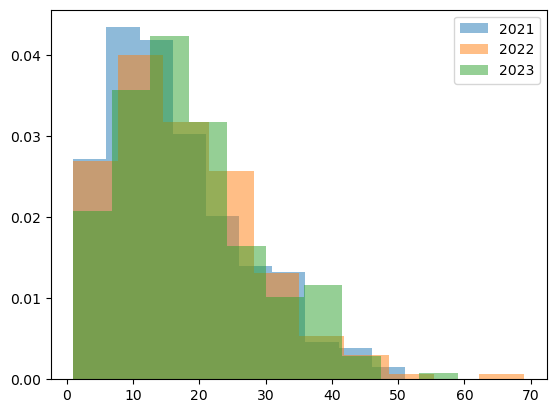

TypeError: 'module' object is not callable

In [71]:
import matplotlib as pyplot
import matplotlib.pyplot as plt

len2021 = valid_sent[valid_sent['year']=='2021']['word_cnt']
len2022 = valid_sent[valid_sent['year']=='2022']['word_cnt']
len2023 = valid_sent[valid_sent['year']=='2023']['word_cnt']

# valid_sent[valid_sent['year']=='2021']['word_cnt'].hist(alpha=0.5, label='2021')
# valid_sent[valid_sent['year']=='2022']['word_cnt'].hist(alpha=0.5, label='2022')
# valid_sent[valid_sent['year']=='2023']['word_cnt'].hist(alpha=0.5, label='2023')


plt.hist(len2021, alpha=0.5, label='2021', density=True)
plt.hist(len2022, alpha=0.5, label='2022', density=True)
plt.hist(len2023, alpha=0.5, label='2023', density=True)
plt.legend(loc='upper right')
plt.show()

pyplot.legend(loc='upper right')

